<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB1/blob/main/6351071043_LAB1_Bai5a(trang_45).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5. (Lập trình) Hãy thực hiện lại bài tập lập trình ở phần hướng dẫn chung nhưng thay
đổi các yêu cầu thành:

a) Nước Đức ‘Germany’, min_sup = 5% và min_conf = 50%.

1. Đọc dữ liệu vào chương trình


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

%matplotlib inline
warnings.filterwarnings('ignore')

In [21]:
print("Nguyễn Thành Luân - 6351071043")
df = pd.read_excel("Online Retail.xlsx")
df.info()

Nguyễn Thành Luân - 6351071043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


2. Tiền xử lý dữ liệu: cắt bỏ các ký tự thừa ở tên mặt hàng mua (cột Description), xóa các dòng dữ liệu không có số hóa đơn (cột InvoiceNo) và chuyển nó về kiểu dữ liệu chuỗi.


In [22]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

print("Nguyễn Thành Luân - 6351071043")
print(df.head(10))

Nguyễn Thành Luân - 6351071043
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  Unit

3. Trong dữ liệu đã cho, có một số hóa đơn là hóa đơn tín dụng thay vì là hóa đơn ghi
nợ vì vậy hãy xóa những hóa đơn đó. Chúng được xác định với ký tự ‘C’ chứa trong
số hóa đơn InvoiceNo.


In [23]:
print("Nguyễn Thành Luân - 6351071043")
df[df.InvoiceNo.str.contains('C', na=False)].head()

Nguyễn Thành Luân - 6351071043


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [24]:
df = df[~df['InvoiceNo'].str.contains('C')]

4. Thống kê số dòng dữ liệu theo từng quốc gia.


Nguyễn Thành Luân - 6351071043


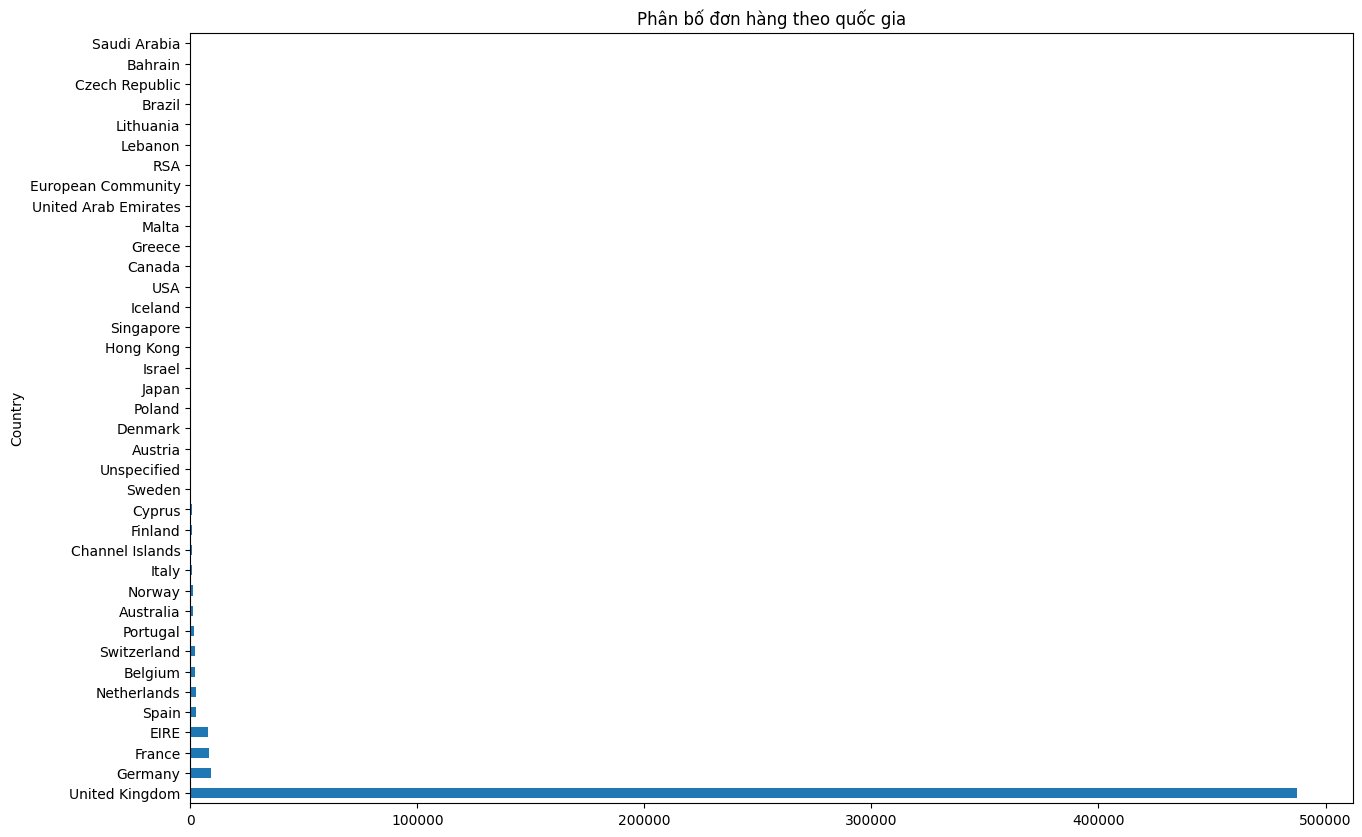

In [25]:
print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(15,10))
df['Country'].value_counts().plot(kind='barh')
plt.title("Phân bố đơn hàng theo quốc gia")
plt.show()

5. Lấy ra dữ liệu hóa đơn từ nước Anh ‘United Kingdom’ và gom nhóm cột Số lượng
mua (Quantity) theo Số hóa đơn (InvoiceNo) và Tên mặt hàng (Description).


In [26]:
print("Nguyễn Thành Luân - 6351071043")
basket = df[df['Country'] == "Germany"].groupby(['InvoiceNo', 'Description'])['Quantity']

Nguyễn Thành Luân - 6351071043


6. Chuyển đổi dữ liệu về dạng hot encoding, với mỗi dòng dữ liệu là một hóa đơn.


In [27]:
print("Nguyễn Thành Luân - 6351071043")
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head(10)

Nguyễn Thành Luân - 6351071043


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


7. Chuyển đổi dữ liệu từ dạng hot encoding thành one-hot encoding.


In [28]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

basket = basket.applymap(encode_data)

8. Do cột ‘POSTAGE’ là tiền cước phí trên mỗi hóa đơn nên cần xóa nó đi.


In [29]:
if 'POSTAGE' in basket.columns:
    basket.drop('POSTAGE', inplace=True, axis=1)
    print("Đã xóa cột POSTAGE")

Đã xóa cột POSTAGE


9. Tìm tập phổ biến bằng thuật toán Apriori với min_sup = 3%.


In [30]:
print("Nguyễn Thành Luân - 6351071043")
itemsets = apriori(basket,
                   min_support=0.05,
                   use_colnames=True)

print("Kết quả Apriori:")
print(itemsets.head(10))

Nguyễn Thành Luân - 6351071043
Kết quả Apriori:
    support                        itemsets
0  0.102845        (6 RIBBONS RUSTIC CHARM)
1  0.070022     (ALARM CLOCK BAKELIKE PINK)
2  0.065646   (CHARLOTTE BAG APPLES DESIGN)
3  0.050328  (CHILDRENS CUTLERY DOLLY GIRL)
4  0.061269      (COFFEE MUG APPLES DESIGN)
5  0.063457    (FAWN BLUE HOT WATER BOTTLE)
6  0.072210             (GUMBALL COAT RACK)
7  0.056893          (IVORY KITCHEN SCALES)
8  0.063457         (JAM JAR WITH PINK LID)
9  0.091904        (JAM MAKING SET PRINTED)


10. Tạo luật kết hợp với min_conf = 50% và in ra các luật này.


In [31]:
print("Nguyễn Thành Luân - 6351071043")
rules = association_rules(itemsets,
                          metric="confidence",
                          min_threshold=0.5)

print("Thông tin luật kết hợp:")
rules.info()


Nguyễn Thành Luân - 6351071043
Thông tin luật kết hợp:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         8 non-null      object 
 1   consequents         8 non-null      object 
 2   antecedent support  8 non-null      float64
 3   consequent support  8 non-null      float64
 4   support             8 non-null      float64
 5   confidence          8 non-null      float64
 6   lift                8 non-null      float64
 7   representativity    8 non-null      float64
 8   leverage            8 non-null      float64
 9   conviction          8 non-null      float64
 10  zhangs_metric       8 non-null      float64
 11  jaccard             8 non-null      float64
 12  certainty           8 non-null      float64
 13  kulczynski          8 non-null      float64
dtypes: float64(12), object(2)
memory usage: 1.0+ KB


In [32]:

print("Nguyễn Thành Luân - 6351071043")
if not rules.empty:
    rules["antecedents_str"] = rules["antecedents"].apply(lambda x: list(x)[0])
    rules["consequents_str"] = rules["consequents"].apply(lambda x: list(x)[0])

    for i in range(len(rules)):
        print(
            rules.loc[i, 'antecedents_str'], ' ==> ', rules.loc[i, 'consequents_str'],
            '[ Support:', round(rules.loc[i, 'support'], 3),
            ', Confidence:', round(rules.loc[i, 'confidence'], 3), ']'
        )
else:
    print("Không tìm thấy luật nào thỏa mãn điều kiện.")

Nguyễn Thành Luân - 6351071043
PLASTERS IN TIN CIRCUS PARADE  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ Support: 0.068 , Confidence: 0.585 ]
PLASTERS IN TIN SPACEBOY  ==>  PLASTERS IN TIN WOODLAND ANIMALS [ Support: 0.061 , Confidence: 0.571 ]
PLASTERS IN TIN WOODLAND ANIMALS  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ Support: 0.074 , Confidence: 0.54 ]
RED RETROSPOT CHARLOTTE BAG  ==>  WOODLAND CHARLOTTE BAG [ Support: 0.059 , Confidence: 0.844 ]
ROUND SNACK BOXES SET OF 4 FRUITS  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ Support: 0.131 , Confidence: 0.833 ]
ROUND SNACK BOXES SET OF4 WOODLAND  ==>  ROUND SNACK BOXES SET OF 4 FRUITS [ Support: 0.131 , Confidence: 0.536 ]
SPACEBOY LUNCH BOX  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ Support: 0.07 , Confidence: 0.681 ]
WOODLAND CHARLOTTE BAG  ==>  ROUND SNACK BOXES SET OF4 WOODLAND [ Support: 0.063 , Confidence: 0.5 ]


11. Biểu diễn độ tin cậy, độ hỗ trợ của tập luật lên đồ thị phân tán (scatter plot).


Nguyễn Thành Luân - 6351071043


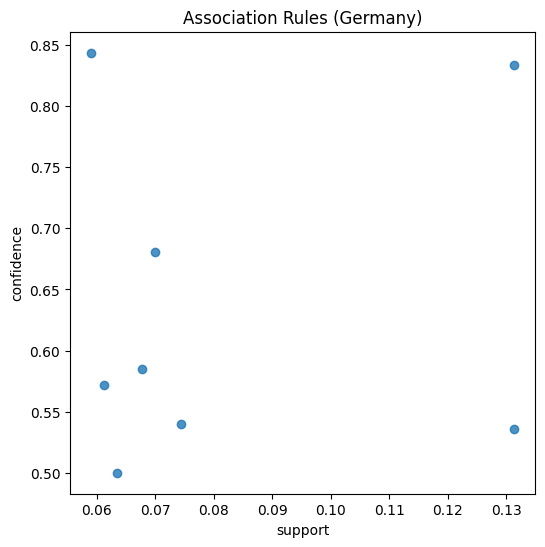

In [33]:
print("Nguyễn Thành Luân - 6351071043")
if not rules.empty:
    support = rules['support'].values
    confidence = rules['confidence'].values

    plt.figure(figsize=(6, 6))
    plt.title('Association Rules (Germany)')
    plt.xlabel('support')
    plt.ylabel('confidence')
    sns.regplot(x=support, y=confidence, fit_reg=False)
    plt.show()
else:
    print("Không có dữ liệu để vẽ biểu đồ.")

12. Tìm tập phổ biến và luật kết hợp bằng thuật toán FP-Growth với min_sup = 3%, min_conf = 50%. So sánh kết quả với thuật toán Apriori ở trên.

In [34]:

print("Nguyễn Thành Luân - 6351071043")
itemsets_fp = fpgrowth(basket, min_support=0.05, use_colnames=True)

print("Kết quả FP-Growth:")
print(itemsets_fp.head(10))

Nguyễn Thành Luân - 6351071043
Kết quả FP-Growth:
    support                              itemsets
0  0.100656          (JUMBO BAG WOODLAND ANIMALS)
1  0.102845              (6 RIBBONS RUSTIC CHARM)
2  0.091904              (JAM MAKING SET PRINTED)
3  0.085339     (PACK OF 72 RETROSPOT CAKE CASES)
4  0.063457               (JAM JAR WITH PINK LID)
5  0.078775             (JUMBO BAG RED RETROSPOT)
6  0.067834    (WOODLAND PARTY BAG + STICKER SET)
7  0.056893                (IVORY KITCHEN SCALES)
8  0.054705           (MEMO BOARD COTTAGE DESIGN)
9  0.245077  (ROUND SNACK BOXES SET OF4 WOODLAND)
